# Clasificador de deportes con Keras


### Clases disponibles:

* lacrosse
* shuffleboard
* arm wrestling
* golf
* surfing
* snow boarding
* parallel bar
* pole climbing
* giant slalom
* bobsled
* baton twirling
* weightlifting
* hydroplane racing
* barell racing
* water cycling
* mushing
* uneven bars
* pole vault
* roller derby
* rowing
* jousting
* air hockey
* sky surfing
* shot put
* sidecar racing
* field hockey
* harness racing
* disc golf
* canoe slamon
* football
* ski jumping
* ice yachting
* cricket
* figure skating women
* horse racing
* baseball
* billiards
* bowling
* motorcycle racing
* javelin
* fly fishing
* bull riding
* sumo wrestling
* tug of war
* figure skating men
* sailboat racing
* horse jumping
* basketball
* cheerleading
* frisbee
* high jump
* water polo
* polo
* rock climbing
* rollerblade racing
* figure skating pairs
* balance beam
* formula 1 racing
* volleyball
* hang gliding
* ultimate
* croquet
* table tennis
* rugby
* fencing
* ampute football
* nascar racing
* hockey
* pommel horse
* wingsuit flying
* jai alai
* hammer throw
* steer wrestling
* swimming
* luge
* wheelchair basketball
* tennis
* bungee jumping
* rings
* bmx
* wheelchair racing
* trapeze
* archery
* curling
* skydiving
* log rolling
* boxing
* olympic wrestling
* bike polo
* snowmobile racing
* axe throwing
* judo
* ice climbing
* gaga
* pole dancing
* track bicycle
* chuckwagon racing
* hurdles
* horseshoe pitching
* speed skating

Resolución de imagen original: **224x224** px

In [4]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

2024-02-27 18:57:39.717716: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Preprocesamiento de las imágenes

Lo primero que vamos a hacer es leer el dataset de imagenes y convertir todas ellas **224x224** px con una profundidad de color de **0-255**

In [5]:
DATADIR = "/Users/albert99/Desktop/Proyectos/DATASETS/sports/"

CATEGORIES = [
    "lacrosse",
    "shuffleboard",
    "arm wrestling",
    "golf",
    "surfing",
    "snow boarding",
    "parallel bar",
    "pole climbing",
    "giant slalom",
    "bobsled",
    "baton twirling",
    "weightlifting",
    "hydroplane racing",
    "barell racing",
    "water cycling",
    "mushing",
    "uneven bars",
    "pole vault",
    "roller derby",
    "rowing",
    "jousting",
    "air hockey",
    "sky surfing",
    "shot put",
    "sidecar racing",
    "field hockey",
    "harness racing",
    "disc golf",
    "canoe slamon",
    "football",
    "ski jumping",
    "ice yachting",
    "cricket",
    "figure skating women",
    "horse racing",
    "baseball",
    "billiards",
    "bowling",
    "motorcycle racing",
    "javelin",
    "fly fishing",
    "bull riding",
    "sumo wrestling",
    "tug of war",
    "figure skating men",
    "sailboat racing",
    "horse jumping",
    "basketball",
    "cheerleading",
    "frisbee",
    "high jump",
    "water polo",
    "polo",
    "rock climbing",
    "rollerblade racing",
    "figure skating pairs",
    "balance beam",
    "formula 1 racing",
    "volleyball",
    "hang gliding",
    "ultimate",
    "croquet",
    "table tennis",
    "rugby",
    "fencing",
    "ampute football",
    "nascar racing",
    "hockey",
    "pommel horse",
    "wingsuit flying",
    "jai alai",
    "hammer throw",
    "steer wrestling",
    "swimming",
    "luge",
    "wheelchair basketball",
    "tennis",
    "bungee jumping",
    "rings",
    "bmx",
    "wheelchair racing",
    "trapeze",
    "archery",
    "curling",
    "skydiving",
    "log rolling",
    "boxing",
    "olympic wrestling",
    "bike polo",
    "snowmobile racing",
    "axe throwing",
    "judo",
    "ice climbing",
    "gaga",
    "pole dancing",
    "track bicycle",
    "chuckwagon racing",
    "hurdles",
    "horseshoe pitching",
    "speed skating"
]

CATEGORIES = [
    "lacrosse",
    "shuffleboard"
]



In [6]:
def preprocessing_data(DATADIR, CATEGORIES, training_data, IMG_SIZE_X, IMG_SIZE_Y, CATEGORIES_DICT={}):
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        
        # asignar valor numérico a cada categoría (one-hot encoding
        class_num = CATEGORIES.index(category)
        CATEGORIES_DICT[category] = str(class_num) # agregarlo al diccionario
        
        print("CAT: " + category + " | OHE: -> " + str(class_num))
        cont_img = 0
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)            
                # redimensionar la imagen
                new_array = cv2.resize(img_array, (IMG_SIZE_X, IMG_SIZE_Y))
                # agregar a la lista
                training_data.append([new_array, class_num])
                # control
                cont_img=cont_img+1
                print("          PROC: " + os.path.join(path, img))
            
            except Exception:
                pass

        print("     TOTAL PROCESADO -> " + str(cont_img) + "/" + str(len(os.listdir(path))) )
        
    print("PREPROCESAMIENTO FINALIZADO CON ÉXITO!")

    
training_data = []
valid_data = []
test_data = []

CATEGORIES_DICT = {} # diccionario que relaciona <nombre_categoria>,<numero_asociado>

IMG_SIZE = 100

In [7]:
# Preprocesado de datos de entrenamiento
preprocessing_data(DATADIR+"train", CATEGORIES, training_data, IMG_SIZE, IMG_SIZE, CATEGORIES_DICT)

# Preprocesado de datos de validación
preprocessing_data(DATADIR+"valid", CATEGORIES, valid_data, IMG_SIZE, IMG_SIZE)

# Preprocesado de datos de test
preprocessing_data(DATADIR+"test", CATEGORIES, test_data, IMG_SIZE, IMG_SIZE)

CAT: lacrosse | OHE: -> 0
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/lacrosse/016.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/lacrosse/002.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/lacrosse/003.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/lacrosse/017.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/lacrosse/149.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/lacrosse/029.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/lacrosse/001.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/lacrosse/015.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/lacrosse/014.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/lacrosse/028.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/lacrosse/148

          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/shuffleboard/059.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/shuffleboard/065.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/shuffleboard/071.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/shuffleboard/111.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/shuffleboard/105.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/shuffleboard/108.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/shuffleboard/120.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/shuffleboard/097.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/shuffleboard/083.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/train/shuffleboard/068.jpg
          PROC: /Users/albert99/Desktop/Proyectos/DATASETS/sports/trai

In [8]:
print("Tam. dataset entrenamiento: ", len(training_data)) # Tamano del dataset (cantidad de imágenes)
print("Tam. dataset validación: ", len(valid_data)) 
print("Tam. dataset test: ", len(test_data)) 

Tam. dataset entrenamiento:  281
Tam. dataset validación:  10
Tam. dataset test:  10


In [9]:
# Visualizamos la estructura de cada elemento de la lista de entrenamiento

print("Feature: ... " + str(training_data[0][0]) + " ... asociada a etiqueta -> " + str(training_data[0][1]))

Feature: ... [[126 150 152 ... 163 148 101]
 [149 165 171 ... 140 134 111]
 [160 170 158 ... 121 126 125]
 ...
 [ 89  98 100 ... 105  91  96]
 [ 95  95  86 ...  86  85  99]
 [ 86  97 110 ...  82  83  82]] ... asociada a etiqueta -> 0


In [10]:
# Barajar el dataset de entrenamiento (los otros no importan)

import random

random.shuffle(training_data)

In [11]:
# Comprobamos que está barajado (randomizado) mostrando sus etiquetas

for ejemplo in training_data[:10]: # solo los 10 primeros de la lista para simplificar
    print(ejemplo[1])

1
1
0
0
1
0
1
1
1
0


In [12]:
# Separamos las imágenes y las etiquetas en dos listas distintas para cada set de datos

X_train = [] # set de datos de entrenamiento
y_train = []

X_valid = [] # set de datos de validación
y_valid = []

X_test = [] # set de datos de test
y_test = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
    
# Transformo entrenamiento a array numpy
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # -1=tam.comodín, 1=escala grises (3=RGB)
y_train = np.array(y_train).reshape(-1)

for features, label in valid_data:
    X_valid.append(features)
    y_valid.append(label)
    
# Transformo validación a array numpy
X_valid = np.array(X_valid).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
y_valid = np.array(y_valid).reshape(-1)

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)
    
# Transformo validación a array numpy
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

In [13]:
# Comprobamos la forma que tienen los sets de entrenamiento, validación y test

print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

print(X_test.shape)
print(y_test.shape)

(281, 100, 100, 1)
(281,)
(10, 100, 100, 1)
(10,)
(10, 100, 100, 1)
(10,)


In [14]:
# Compruebo que el diccionario de categorías One Hot Enc. se ha creado correctamente

CATEGORIES_DICT

{'lacrosse': '0', 'shuffleboard': '1'}

In [15]:
# Escalamos las intensidades de los pixeles en el rango de 0-1 para simplificar

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [16]:
# Compruebo que se ha normalizado correctamente
X_train

array([[[[0.09411765],
         [0.10588235],
         [0.10980392],
         ...,
         [0.10980392],
         [0.08235294],
         [0.11764706]],

        [[0.10196078],
         [0.12156863],
         [0.11764706],
         ...,
         [0.11372549],
         [0.09019608],
         [0.09803922]],

        [[0.11372549],
         [0.1254902 ],
         [0.12156863],
         ...,
         [0.11372549],
         [0.10196078],
         [0.09411765]],

        ...,

        [[0.06666667],
         [0.06666667],
         [0.06666667],
         ...,
         [0.06666667],
         [0.06666667],
         [0.06666667]],

        [[0.07058824],
         [0.0745098 ],
         [0.0745098 ],
         ...,
         [0.06666667],
         [0.06666667],
         [0.06666667]],

        [[0.06666667],
         [0.07058824],
         [0.07058824],
         ...,
         [0.07058824],
         [0.07058824],
         [0.07058824]]],


       [[[0.11764706],
         [0.11764706],
         [0.11

## Creación del modelo usando API secuencial

Construcción de la red neuronal

In [17]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 1)),
    tf.keras.layers.Flatten(),  # Aplanar la imagen
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="softmax")  # 100 neuronas para 100 clases
])

2024-02-27 18:58:19.119965: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 300)               3000300   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
Total params: 3,040,500
Trainable params: 3,040,500
Non-trainable params: 0
_________________________________________________________________


### INFORMACIÓN ADICIONAL

1. **Clasificación Multiclase**:

Las etiquetas son únicas y exclusivas para cada instancia.

Se utiliza una función de activación softmax en la capa de salida para obtener probabilidades para cada clase.
La función de pérdida comúnmente utilizada es **categorical_crossentropy**.

En la salida, solo una de las neuronas de la capa de salida tendrá una activación alta, indicando la clase predicha para esa instancia.

2. **Clasificación de Etiquetas Múltiples**:

Las etiquetas no son mutuamente excluyentes y una instancia puede tener múltiples etiquetas activas.

Se utiliza una función de activación sigmoid en la capa de salida para obtener probabilidades independientes para cada clase.
La función de pérdida comúnmente utilizada es **binary_crossentropy**.

En la salida, cada neurona de la capa de salida representa una clase y puede tener una activación alta o baja independientemente de las otras neuronas, lo que permite que una instancia tenga múltiples clases activas.

## Compilar el modelo

Establecer la función de pérdida y el optimizador que se va a usar

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Entrenamiento y evaluación del modelo

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
9/9 [==============================] - 0s 12ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2131 - val_accuracy: 0.9000
Epoch 2/30
9/9 [==============================] - 0s 8ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2124 - val_accuracy: 0.9000
Epoch 3/30
9/9 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2076 - val_accuracy: 0.9000
Epoch 4/30
9/9 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2074 - val_accuracy: 0.9000
Epoch 5/30
9/9 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2083 - val_accuracy: 0.9000
Epoch 6/30
9/9 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2082 - val_accuracy: 0.9000
Epoch 7/30
9/9 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.2075 - val_accuracy: 0.9000
Epoch 8/30
9/9 [=================

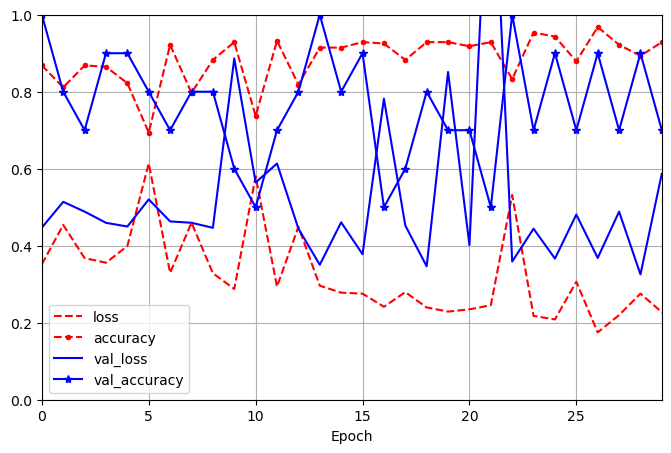

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [23]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 22ms/step - loss: 0.2789 - accuracy: 0.8000


[0.2789466977119446, 0.800000011920929]

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 1, 1, 128)      

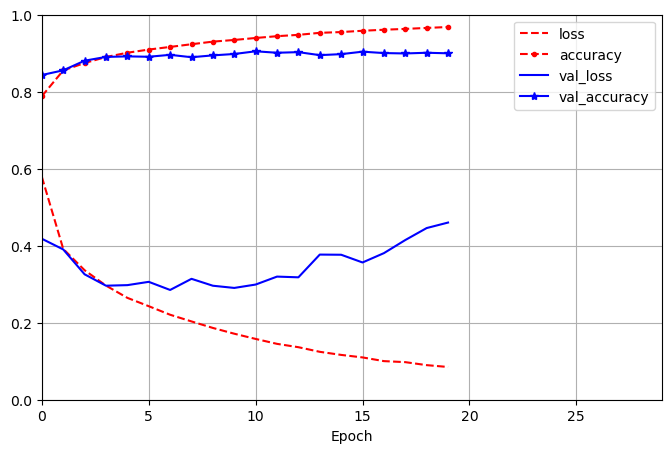

In [99]:
import tensorflow as tf
from tensorflow.keras import layers, models


# Dataset de ropa

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.


# Definir la arquitectura del modelo
model = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Segunda capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Tercera capa convolucional
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Capa de aplanamiento
    layers.Flatten(),
    
    # Capa densa con activación ReLU
    layers.Dense(256, activation='relu'),
    
    # Capa de salida con activación softmax para la clasificación multiclase
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenamiento
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))

# Evaluación
model.evaluate(X_test, y_test)


import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()


In [105]:
X_new= X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

y_pred = y_proba.argmax(axis=-1)
y_pred


1/1 [==============================] - 0s 19ms/step


array([9, 2, 1])

## Tensorboard

In [106]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [108]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

2024-02-26 17:04:57.780977: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2024-02-26 17:04:57.780998: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2024-02-26 17:04:57.781859: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


Epoch 1/20
 113/1719 [>.............................] - ETA: 20s - loss: 0.0711 - accuracy: 0.9718

2024-02-26 17:04:59.304079: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2024-02-26 17:04:59.304101: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


 204/1719 [==>...........................] - ETA: 20s - loss: 0.0722 - accuracy: 0.9732

2024-02-26 17:05:00.610734: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2024-02-26 17:05:00.649924: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2024-02-26 17:05:00.690378: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2024_02_26_17_02_51/plugins/profile/2024_02_26_17_05_00

2024-02-26 17:05:00.712701: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to my_logs/run_2024_02_26_17_02_51/plugins/profile/2024_02_26_17_05_00/MBP.local.trace.json.gz
2024-02-26 17:05:00.742043: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2024_02_26_17_02_51/plugins/profile/2024_02_26_17_05_00

2024-02-26 17:05:00.742259: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to my_logs/run_2024_02_26_17_02_51/plugins/profile/2024

1719/1719 [==============================] - 24s 14ms/step - loss: 0.0811 - accuracy: 0.9692 - val_loss: 0.4977 - val_accuracy: 0.8966
Epoch 2/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.0751 - accuracy: 0.9709 - val_loss: 0.4983 - val_accuracy: 0.8950
Epoch 3/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.0716 - accuracy: 0.9732 - val_loss: 0.5282 - val_accuracy: 0.8958
Epoch 4/20
1719/1719 [==============================] - 25s 15ms/step - loss: 0.0711 - accuracy: 0.9726 - val_loss: 0.5309 - val_accuracy: 0.8978
Epoch 5/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.0644 - accuracy: 0.9758 - val_loss: 0.5226 - val_accuracy: 0.8976
Epoch 6/20
1719/1719 [==============================] - 23s 14ms/step - loss: 0.0653 - accuracy: 0.9752 - val_loss: 0.5363 - val_accuracy: 0.8994
Epoch 7/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.0602 - accuracy: 0.9776 - val_loss: 0.5613 - val_accura

In [109]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs